In [1]:
import matplotlib
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
import os
os.chdir('C:/pytest/')

In [3]:
# 읽기 함수 정의(전체 본문에 대해 id, doc, label을 중첩리스트 형태로 변환)
def read_data(filename, encoding='cp949', start=1):
    # with 구문의 장점 = close()가 자동으로 실행됨
    with open(filename, 'r', encoding=encoding) as f:
        # List Comprehension(캐리지 리턴으로 구분한 텍스트에서 tab으로 다시 문장을 나눔 -> 중첩리스트)
        data = [line for line in f.read().splitlines()]
    return data

def write_data(data, filename, encoding='cp949'): # 쓰기 함수도 정의
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

data = read_data('김소월시.txt' , encoding='utf8')

In [4]:
data

['못 잊어',
 '',
 '                                                                      김     소     월',
 '',
 ' ',
 '',
 ' ',
 '',
 '         못 잊어 생각이 나겠지요,',
 '         그런대로 한세상 지내시구려,',
 '         사노라면 잊힐 날 있으리다.',
 '',
 '         못 잊어 생각이 나겠지요,',
 '         그런대로 세월만 가라시구려,',
 '         못 잊어도 더러는 잊히오리다.',
 '',
 '         그러나 또 한끝 이렇지요,',
 '         그리워 살뜰히 못 잊는데,',
 '         어쩌면 생각이 떠지나요?',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 '        삭주구성(朔州龜城)',
 '',
 ' ',
 '',
 '물로 사흘 배 사흘',
 '먼 삼천리(三千里)',
 '더더구나 걸어 넘는 먼 삼천리(三千里)',
 '삭주구성(朔州龜城)은 산(山)을 넘은 육천리(六千里)요.',
 '',
 '물 맞아 함빡히 젖은 제비도',
 '가다가 비에 걸려 오노랍니다',
 '저녁에는 높은 산(山)',
 '밤에 높은 산(山)',
 '',
 '삭주구성(朔州龜城)은 산(山) 넘어',
 '먼 육천리(六千里)',
 '가끔가끔 꿈에는 사오천리(四五千里)',
 '가다오다 돌아오는 길이겠지요',
 '',
 '서로 떠난 몸이길래 몸이 그리워',
 '님을 둔 곳이길래 곳이 그리워',
 '못 보았소 새들도 집이 그리워',
 '남북(南北)으로 오며 가며 아니 합디까.',
 '',
 '들 끝에 날아가는 나는 구름은',
 '밤쯤은 어디 바로 가 있을 텐고',
 '삭주구성(朔州龜城)은 산(山) 넘어',
 '먼 육천리(六千里)',
 '',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 '           접동새',
 '',
 ' ',
 '',
 '접동',
 '접

In [5]:
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = ''
for data_each in data:
    morphed_data_each = rhinoMorph.onlyMorph_list(
        rn, data_each, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi= True)
    joined_data_each = ' '.join(morphed_data_each) # 문자열을 하나로 연결
    if joined_data_each: # 내용이 있는 경우만 저장하게 함
        morphed_data += joined_data_each + "\n"
# 형태소 분석된 파일 저장
write_data(morphed_data, '김소월시_morphed.txt', encoding='utf8')

filepath:  c:\project\venv\lib\site-packages
classpath:  c:\project\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [6]:
data = read_data('김소월시_morphed.txt', encoding='utf8', start=0)
print(len(data)) # 495 (일부는 내용이 남지 않아 제외 됨)

244


In [67]:
for line in data:
    if ('김' in line) & ('소' in line) & ('월' in line):
        data[data.index(line)] = '김소월'

In [68]:
# 공백을 추가하며 모든 리스트 요소들을 결합한 후 공백 단위로 분리하여 하나의 리스트로 만든다
mergedText = ' '.join(data)
# print('mergedText:', mergedText)

mergedTextList = mergedText.split(' ')
# print('mergedTextList:', mergedTextList)

In [69]:
# stopwords_ko = ["하다", "있다", "되다", "그", "않다", "없다", "나", "말", "사람", "이", "보다", "한", "때", "년", "같다", "대하다",
# "일", "이", "생각", "위하다", "때문", "그것", "그러나", "가다",
# "받다", "그렇다", "알다", "사회", "더", "그녀", "문제", "오다", "그리고", "크다", "속"]
# # mergedTextList_no_stopwords = mergedTextList 원소 중 불용어에 속하지 않는 원소들
# mergedTextList_no_stopwords = [word for word in mergedTextList if not word in stopwords_ko]
# # print('mergedTextList without stopwords:', mergedTextList_no_stopwords)
# print('불용어 제거 전 길이:', len(mergedTextList))
# print('불용어 제거 후 길이:', len(mergedTextList_no_stopwords))

# mergedTextList = mergedTextList_no_stopwords

In [70]:
from collections import Counter
wordInfo = Counter(mergedTextList) # 하나의 리스트로 묶인 분리된 요소들을 카운트한다 (내림차순)
# print('wordInfo:', wordInfo)

김소월 단어빈도 총합:  730
김소월 고빈도 단어:  ['가다', '잊다', '살다', '하다', '못', '울다', '그립다', '죽다', '꽃', '멀다', '길', '밤', '오다', '이', '저', '들다', '되다', '모르다', '피다', '그']
김소월 고빈도 단어비율:  [3.01, 2.33, 2.05, 1.51, 1.37, 1.37, 1.23, 1.23, 1.23, 1.1, 1.1, 0.96, 0.96, 0.96, 0.96, 0.82, 0.82, 0.82, 0.82, 0.82]


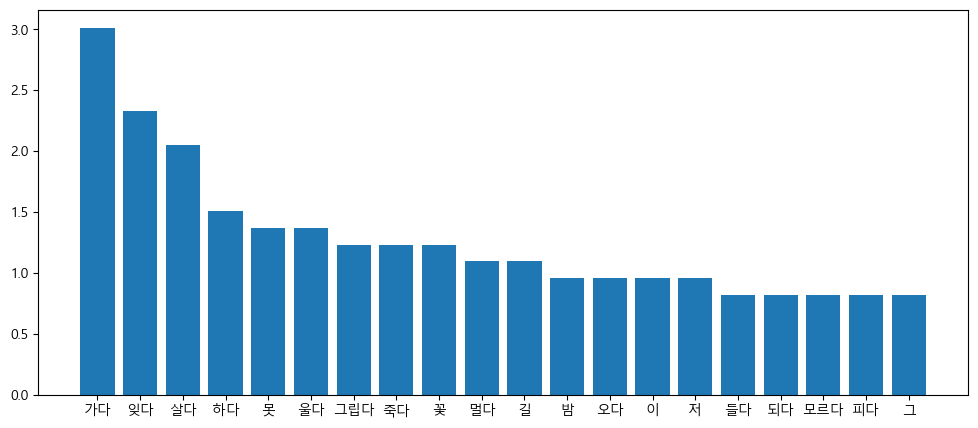

In [71]:
sorted_keys = sorted(wordInfo, key = wordInfo.get, reverse = True)
sorted_values = sorted(wordInfo.values(), reverse = True)

print('김소월 단어빈도 총합: ', sum(sorted_values))
print('김소월 고빈도 단어: ', sorted_keys[:20])
sorted_rates = list(map(lambda x: round((x / sum(sorted_values))*100, 2), sorted_values))
print('김소월 고빈도 단어비율: ', sorted_rates[:20])

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.bar(range(20), sorted_rates[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

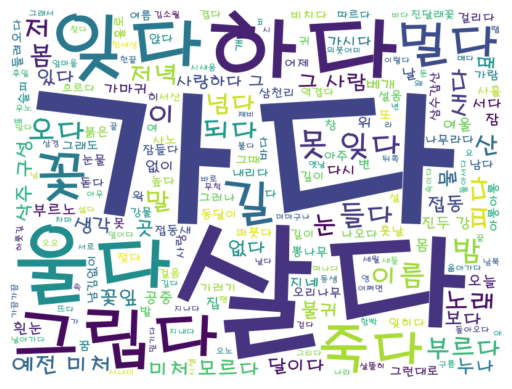

In [72]:
linedata = ' '.join(mergedTextList)
# print(linedata)
font_path = 'C:/Windows/Fonts/H2PORM.ttf'
from wordcloud import WordCloud
cloud = WordCloud(font_path = font_path, width=800, height = 600, background_color='white').generate(linedata)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [73]:
len_data = []
for d in data:
    len_data.append(len(d.split()))

print('첫번째 문장의 형태소 길이:', len_data[0])

첫번째 문장의 형태소 길이: 2


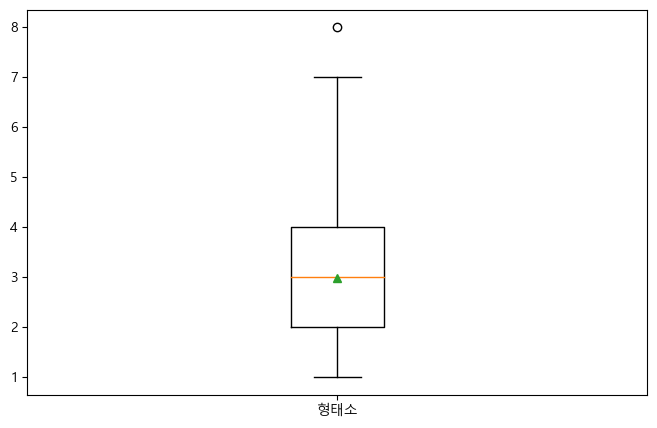

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 5))
plt.boxplot([len_data], labels = ['형태소'], showmeans=True)
plt.show()

In [75]:
import numpy as np

print('텍스트 최대 길이: {}'.format(np.max(len_data)))
print('텍스트 최소 길이: {}'.format(np.min(len_data)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_data)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_data)))
print('텍스트 중간 길이: {}'.format(np.median(len_data)))
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_data, 75)))

텍스트 최대 길이: 8
텍스트 최소 길이: 1
텍스트 평균 길이: 2.99
텍스트 길이 표준편차: 1.35
텍스트 중간 길이: 3.0
제 1 사분위 텍스트 길이: 2.0
제 3 사분위 텍스트 길이: 4.0


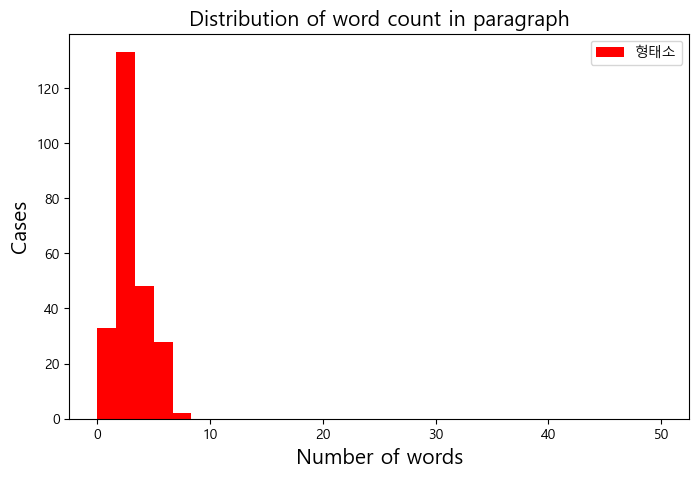

In [76]:
plt.figure(figsize=(8, 5))
plt.hist(len_data, bins=30, range=[0,50], facecolor='r', density=False, label='형태소')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.show()

In [77]:
data2 = read_data('김소월시.txt' , encoding='utf8')

In [88]:
len_data2 = []
for d in data2:
    len_data2.append(len(d.split()))

print("첫번째 문장의 어절 길이:", len_data[0])

첫번째 문장의 어절 길이: 2


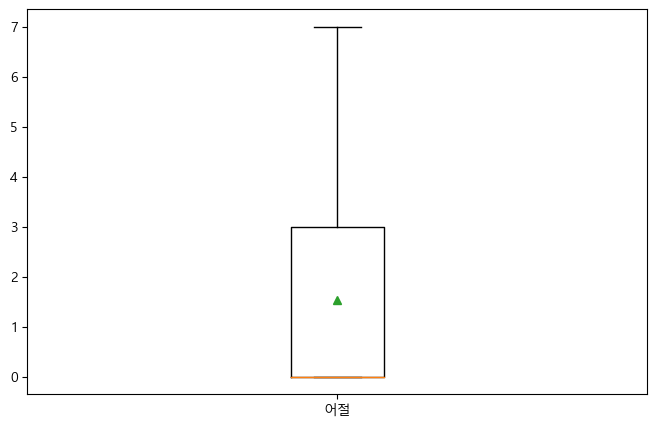

In [89]:
plt.figure(figsize=(8, 5))
plt.boxplot([len_data2], labels=['어절'], showmeans=True)
plt.show()

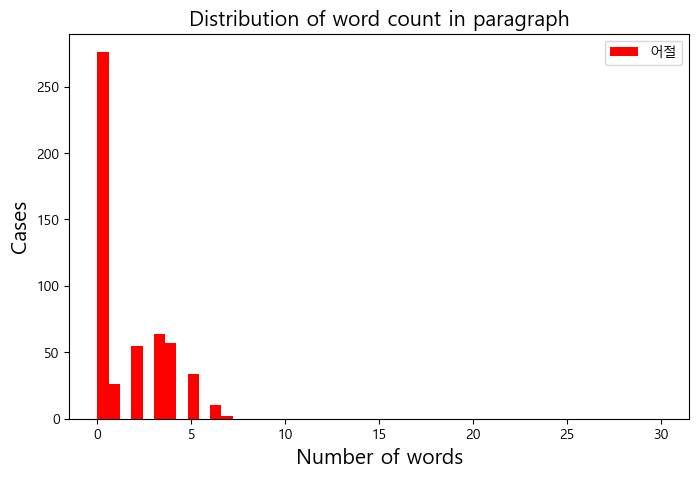

In [90]:
plt.figure(figsize=(8, 5))
plt.hist(len_data2, bins=50, range=[0,30], facecolor='r', density=False, label='어절')
plt.title("Distribution of word count in paragraph", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Cases', fontsize=15)
plt.show()